<a href="https://colab.research.google.com/github/sanagalanandini/dl-4/blob/main/dl_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.python import keras
from tensorflow.python.keras import utils
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer
import imageio # To read images
from PIL import Image # For image resizing

In [ ]:
!unzip agedetectiontest.zip
!unzip agedetectiontrain.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/4046.jpg          
  inflating: Train/4047.jpg          
  inflating: Train/4049.jpg          
  inflating: Train/405.jpg           
  inflating: Train/4051.jpg          
  inflating: Train/4052.jpg          
  inflating: Train/4053.jpg          
  inflating: Train/4055.jpg          
  inflating: Train/4056.jpg          
  inflating: Train/4057.jpg          
  inflating: Train/4058.jpg          
  inflating: Train/4059.jpg          
  inflating: Train/406.jpg           
  inflating: Train/4060.jpg          
  inflating: Train/4061.jpg          
  inflating: Train/4062.jpg          
  inflating: Train/4065.jpg          
  inflating: Train/4066.jpg          
  inflating: Train/4068.jpg          
  inflating: Train/4069.jpg          
  inflating: Train/407.jpg           
  inflating: Train/4070.jpg          
  inflating: Train/4072.jpg          
  inflating: Train/4073.jpg          
  inflating: Train/4076.jpg          

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

Age group: MIDDLE


<ipython-input-31-cd879824e2ee>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/content/Train', img_name))


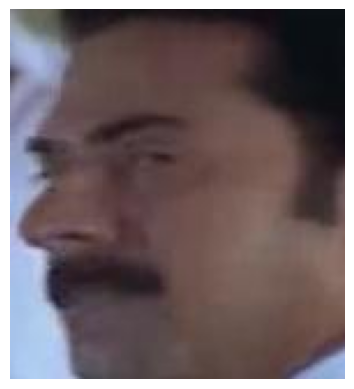

In [ ]:
np.random.seed(3)
idx = np.random.choice(train.index)
img_name = train.ID[idx]
img = imageio.imread(os.path.join('/content/Train', img_name))
print('Age group:', train.Class[idx])
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
temp = []
for img_name in train.ID:
    img_path = os.path.join('Train', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

<ipython-input-15-088a17b7ee58>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [ ]:
temp = []
for img_name in test.ID:
    img_path = os.path.join('Test', img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

<ipython-input-16-110a93957241>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [ ]:
train_x = train_x / 255.
test_x = test_x / 255.

In [ ]:
lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = utils.to_categorical(train_y)

In [ ]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3
epochs = 5
batch_size = 128

In [ ]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/5
125/125 [==============================] - 5s 33ms/step - loss: 0.9042 - accuracy: 0.5676 - val_loss: 0.8744 - val_accuracy: 0.5806
Epoch 2/5
125/125 [==============================] - 3s 27ms/step - loss: 0.8572 - accuracy: 0.5958 - val_loss: 0.8256 - val_accuracy: 0.6236
Epoch 3/5
125/125 [==============================] - 3s 26ms/step - loss: 0.8380 - accuracy: 0.6078 - val_loss: 0.8364 - val_accuracy: 0.6077
Epoch 4/5
125/125 [==============================] - 4s 35ms/step - loss: 0.8253 - accuracy: 0.6157 - val_loss: 0.8076 - val_accuracy: 0.6273
Epoch 5/5
125/125 [==============================] - 4s 29ms/step - loss: 0.8179 - accuracy: 0.6204 - val_loss: 0.8123 - val_accuracy: 0.6303


In [ ]:
pred = np.argmax(model.predict(test_x),axis=1)
pred = lb.inverse_transform(pred)
test['Class'] = pred
test.to_csv('out.csv', index=False)


208/208 [==============================] - 3s 11ms/step


<ipython-input-30-31c251792621>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join('/content/Test', img_name))


208/208 [==============================] - 1s 7ms/step
Original: MIDDLE Predicted: ['MIDDLE']


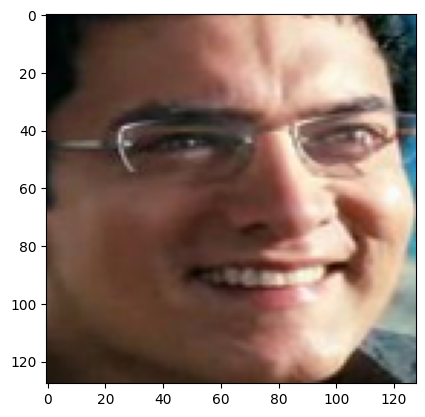

In [ ]:



idx = 2481
img_name = test.ID[idx]
img = imageio.imread(os.path.join('/content/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = np.argmax(model.predict(test_x),axis=1)
#pred = model.predict_classes(test_x)
print('Original:', train.Class[idx], 'Predicted:', lb.inverse_transform([pred[idx]]))
